In [ ]:
import pandas as pd
import numpy as np
import os

Reading Data Set

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving loan train.csv to loan train.csv


In [ ]:
train=pd.read_csv('loan train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving loan test.csv to loan test.csv


In [ ]:
test = pd.read_csv('loan test.csv')

# Assign Loan_ID column from test DataFrame
Loan_ID = test['Loan_ID']

# Concatenate train and test DataFrames
data = pd.concat([train, test])

# Print the first few rows of the data DataFrame
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
data.shape

(981, 12)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
data.Dependents.dtypes

dtype('O')

# Data Preprocessing


 Mapping String values to Numerics

In [ ]:
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


In [ ]:
data.Married=data.Married.map({'Yes':1,'No':0})
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [ ]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [ ]:
data.Property_Area.value_counts()

,count
Property_Area,
1,349
2,342
0,290


Filling Missing Values

In [ ]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

data.isnull().sum()

<ipython-input-23-30e6d01dbe83>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Credit_History.fillna(np.random.randint(0,2),inplace=True)


,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [ ]:
data.Married.fillna(np.random.randint(0,2),inplace=True)
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

<ipython-input-24-2ca02a24d499>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Married.fillna(np.random.randint(0,2),inplace=True)
<ipython-input-24-2ca02a24d499>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
from random import randint
data.Gender.fillna(np.random.randint(0,2),inplace=True)

<ipython-input-25-4610436c0ec6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Gender.fillna(np.random.randint(0,2),inplace=True)


In [ ]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

<ipython-input-26-d2f30733ccc6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Dependents.fillna(data.Dependents.median(),inplace=True)


In [ ]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
data.isnull().sum()

<ipython-input-27-8b416c2299e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.drop('Loan_ID',inplace=True,axis=1)

# Data Visualisation

<Axes: >

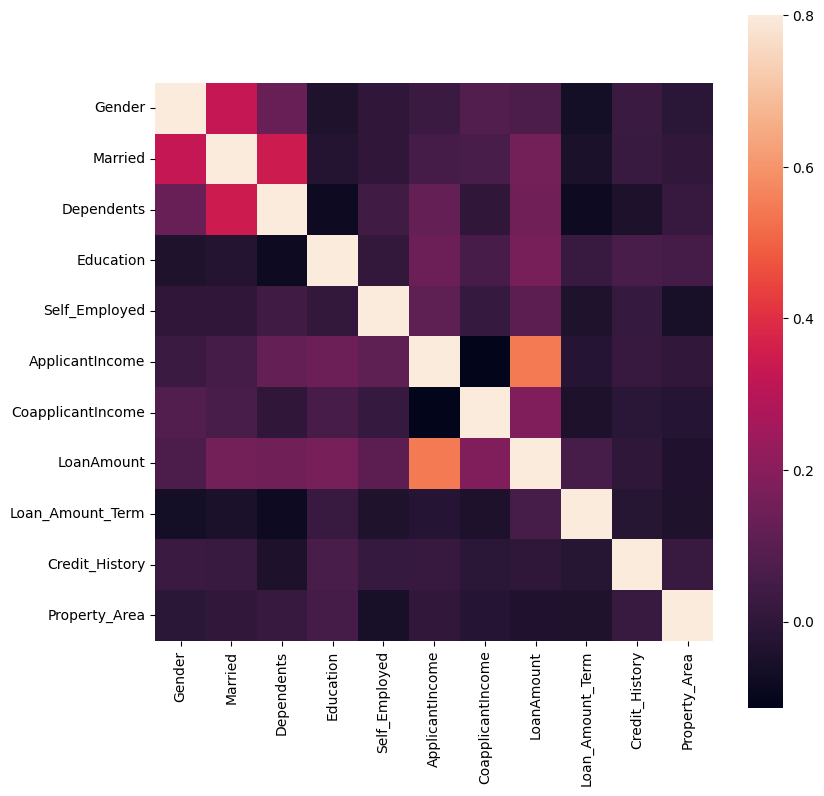

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<ipython-input-100-49aa58f16811>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=data, palette="hls")


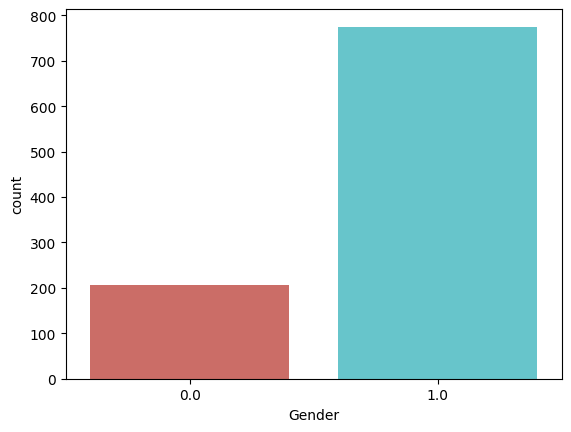

In [ ]:
sns.countplot(x="Gender", data=data, palette="hls")
plt.show()

<ipython-input-101-a5c11746d816>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=data, palette="Paired")


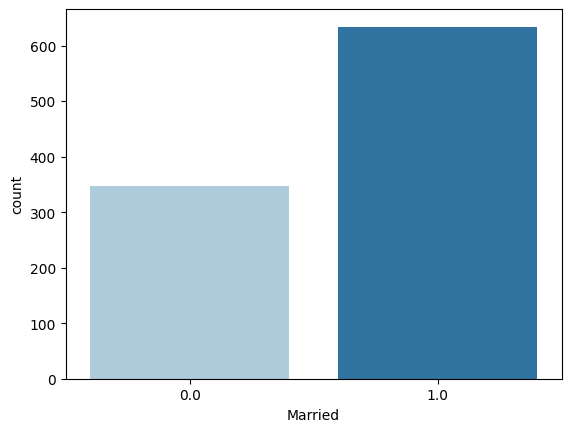

In [ ]:
sns.countplot(x="Married", data=data, palette="Paired")
plt.show()

<ipython-input-102-ffed2096e19a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=data, palette="rocket")


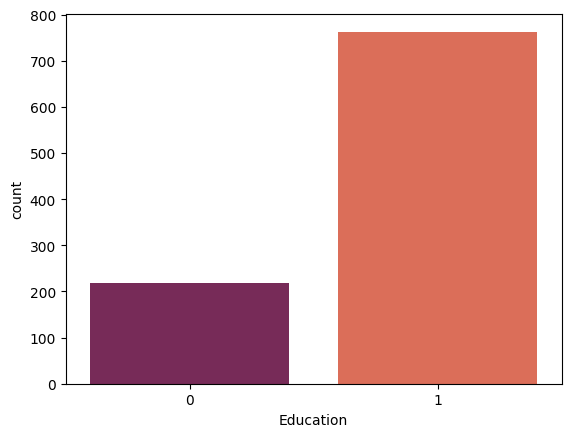

In [ ]:
sns.countplot(x="Education", data=data, palette="rocket")
plt.show()

<ipython-input-103-1534c95d2ef3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=data, palette="viridis")


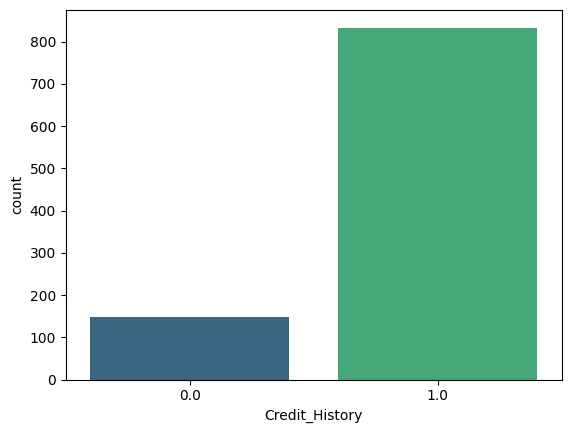

In [ ]:
sns.countplot(x="Credit_History", data=data, palette="viridis")
plt.show()

# Data Training and Testing

In [ ]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [ ]:
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


# Feature Selection


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(train_X, train_y)
mutual_info

array([0.        , 0.        , 0.        , 0.01445155, 0.0191445 ,
       0.00038374, 0.        , 0.        , 0.        , 0.16386519,
       0.0072627 ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_X.columns
mutual_info.sort_values(ascending=False)

,0
Credit_History,0.163865
Self_Employed,0.019145
Education,0.014452
Property_Area,0.007263
ApplicantIncome,0.000384
Gender,0.000000
Married,0.000000
Dependents,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.000000


<Axes: >

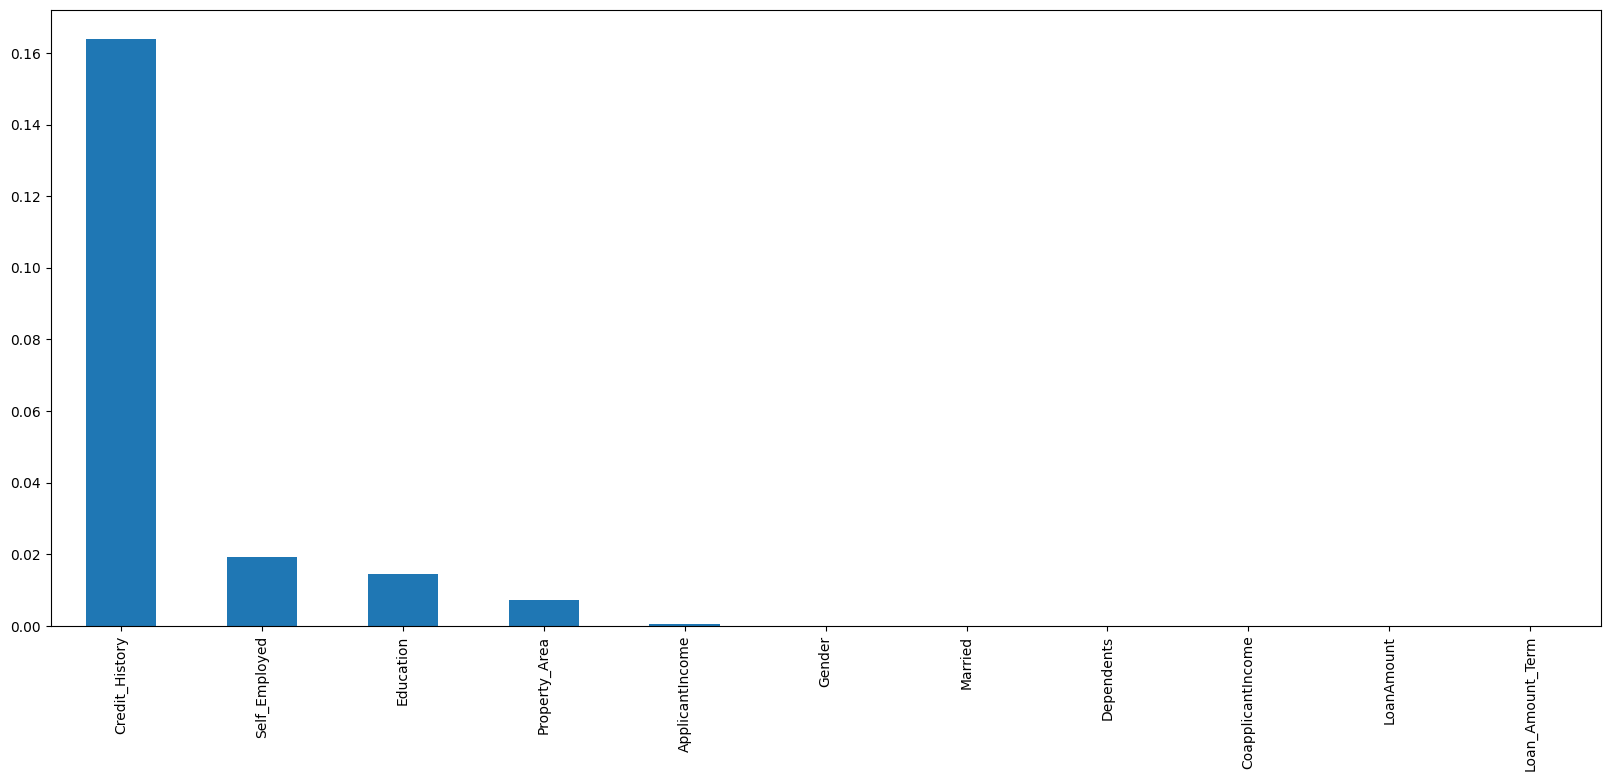

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier()

In [ ]:
a=clf.feature_importances_
a = pd.Series(a)
a.index = train_X.columns
a.sort_values(ascending=False)

,0
Credit_History,0.287600
LoanAmount,0.204050
ApplicantIncome,0.175230
CoapplicantIncome,0.141424
Dependents,0.079911
Property_Area,0.032616
Self_Employed,0.022833
Married,0.019858
Loan_Amount_Term,0.018470
Education,0.013044


<Axes: >

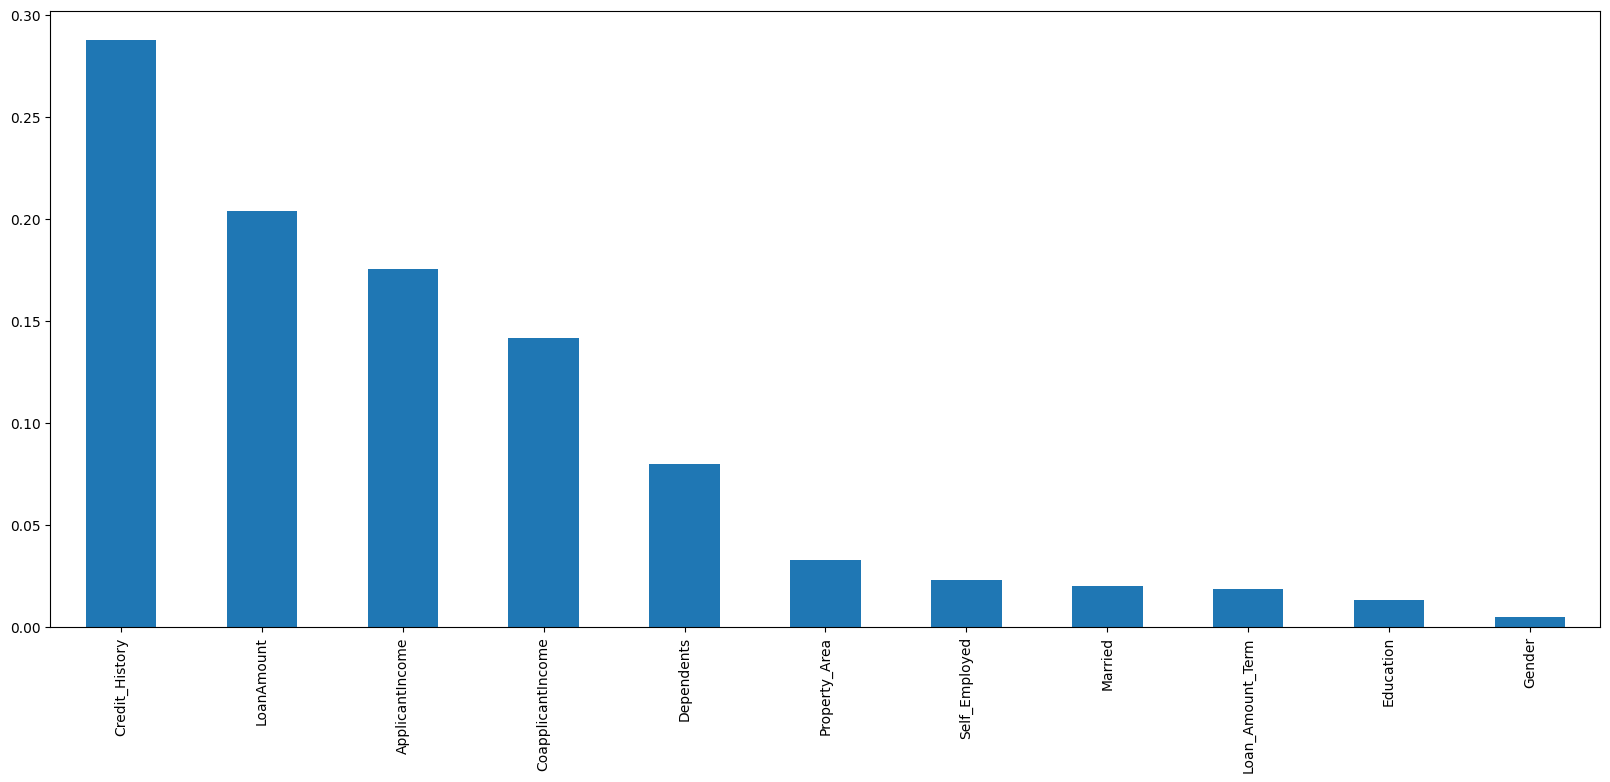

In [ ]:
a.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)

RandomForestClassifier()

In [ ]:
rf=model.feature_importances_
rf = pd.Series(rf)
rf.index = train_X.columns
rf.sort_values(ascending=False)

,0
Credit_History,0.252649
ApplicantIncome,0.205264
LoanAmount,0.191844
CoapplicantIncome,0.113861
Dependents,0.057256
Property_Area,0.049152
Loan_Amount_Term,0.040226
Married,0.025614
Education,0.023486
Self_Employed,0.021725


<Axes: >

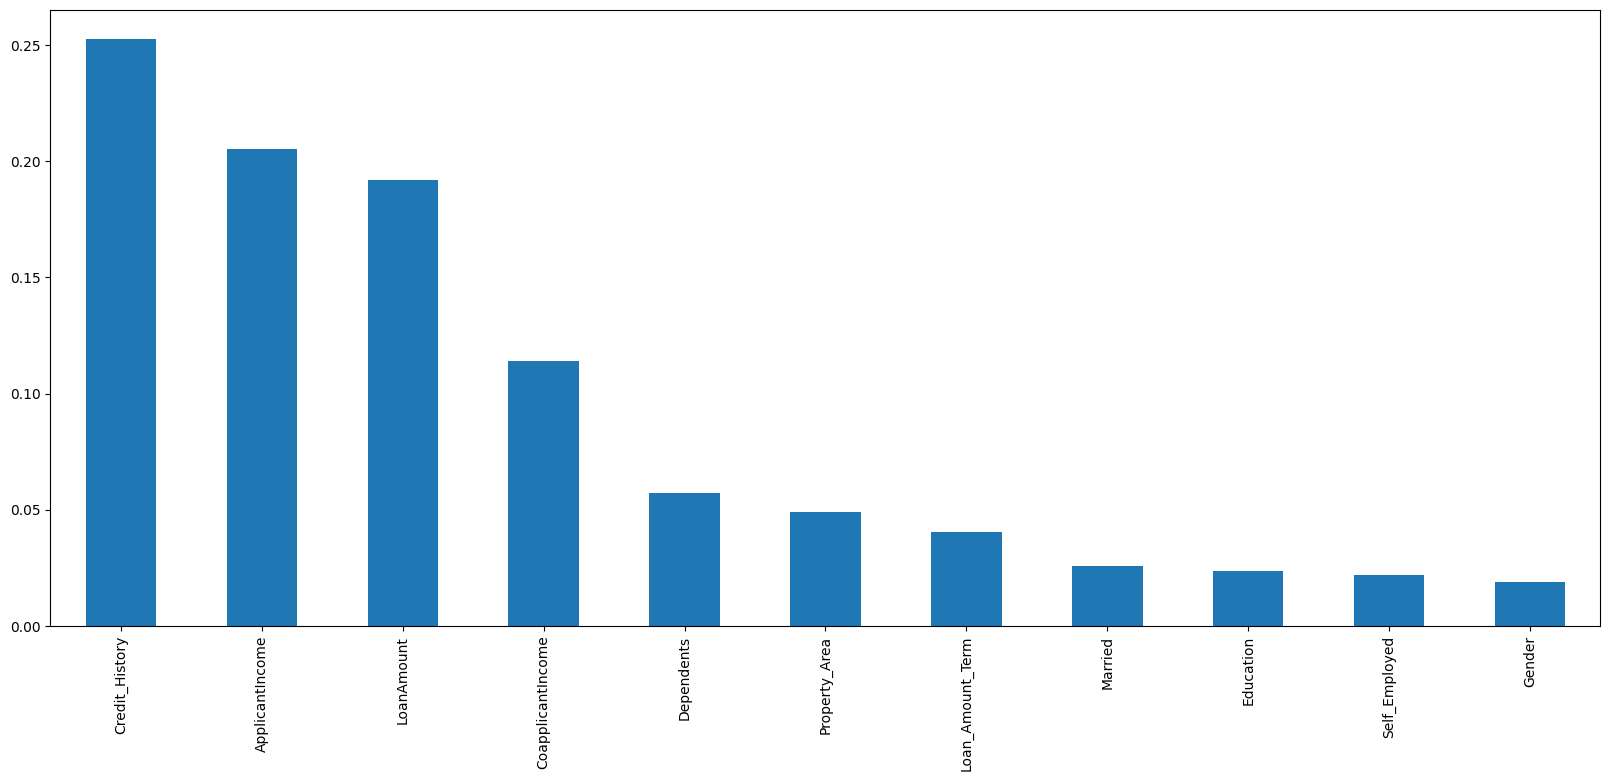

In [ ]:
rf.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_reg = mutual_info_regression(train_X, train_y)
mutual_reg

array([0.        , 0.        , 0.        , 0.        , 0.00476442,
       0.00126341, 0.00707218, 0.        , 0.        , 0.15999371,
       0.05864478])

In [ ]:
mutual_reg = pd.Series(mutual_reg)
mutual_reg.index = train_X.columns
mutual_reg.sort_values(ascending=False)

,0
Credit_History,0.159994
Property_Area,0.058645
CoapplicantIncome,0.007072
Self_Employed,0.004764
ApplicantIncome,0.001263
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
LoanAmount,0.000000


<Axes: >

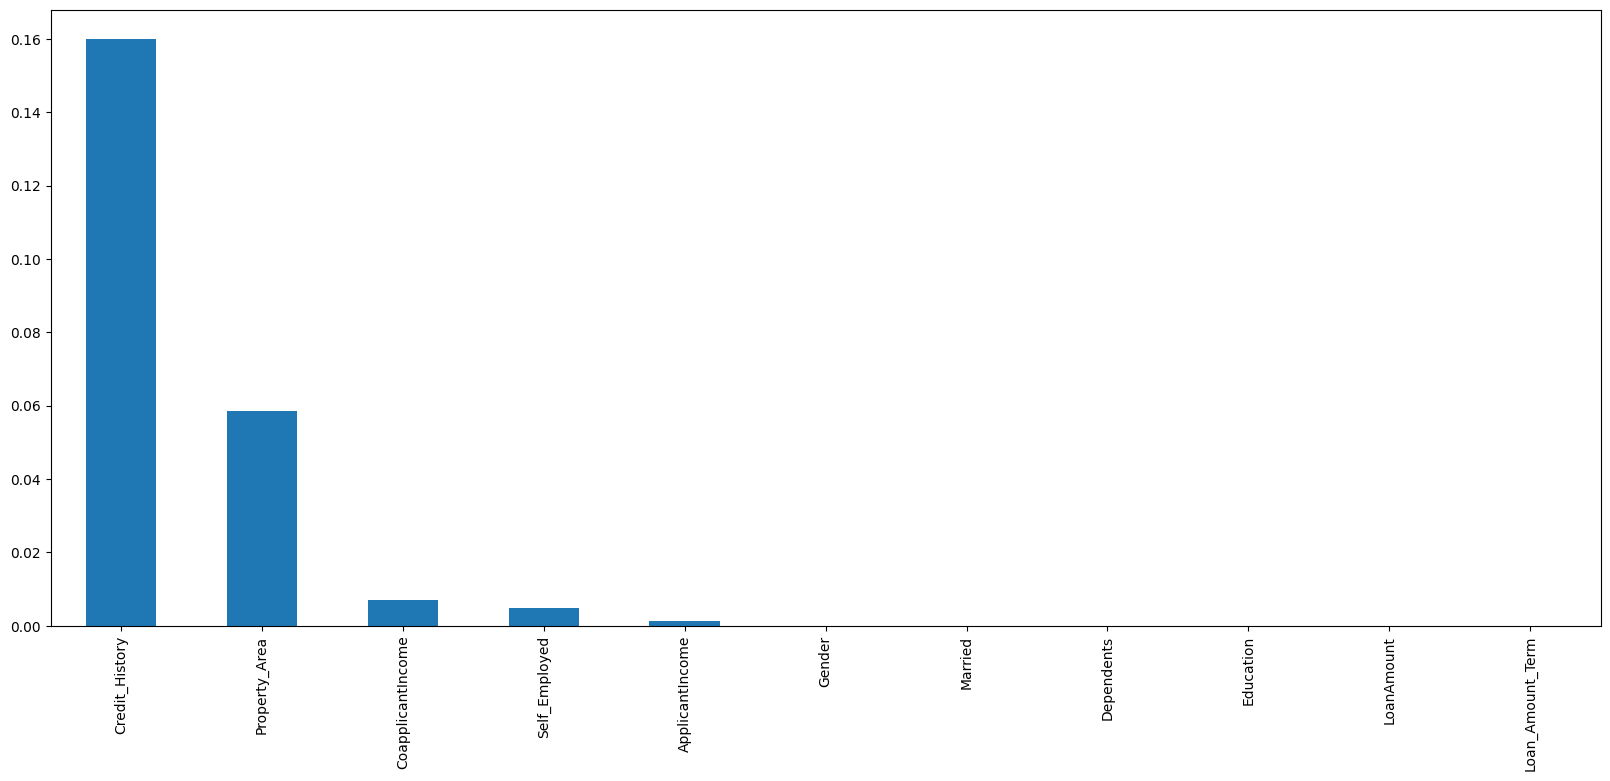

In [ ]:
mutual_reg.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Feature Selection- With Correlation

In this step we will get to know the features which are highly correlated

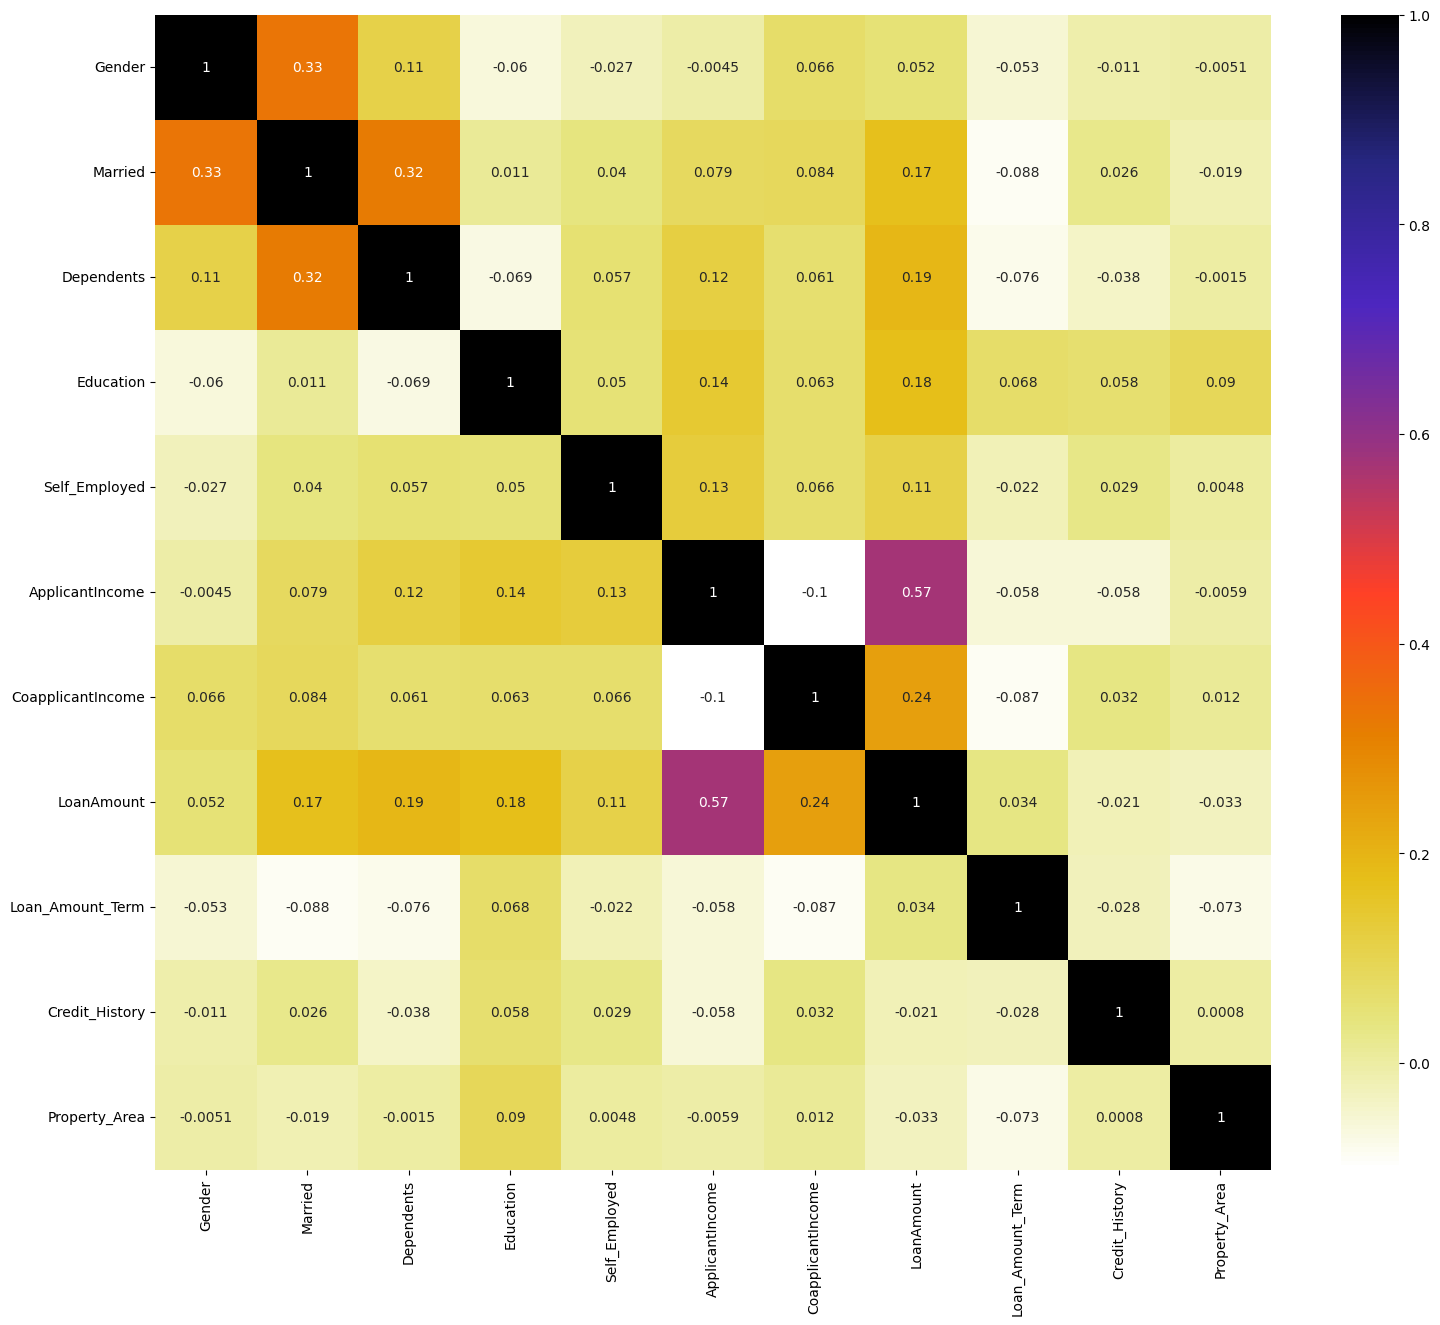

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,15))
cor = train_X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(train_X, 0.3)
len(set(corr_features))

3

In [ ]:
corr_features

{'Dependents', 'LoanAmount', 'Married'}

Fisher Score- Chisquare Test For Feature Selection

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(train_X, train_y)

In [ ]:
f_p_values

(array([9.54986804e-03, 6.66401715e-01, 2.63922119e-01, 1.02420358e+00,
        9.74226480e-03, 1.87549111e+02, 8.46605645e+03, 2.37004017e+01,
        4.24303731e+00, 1.95568012e+01, 4.39257709e-01]),
 array([9.22151913e-01, 4.14308953e-01, 6.07438321e-01, 3.11523978e-01,
        9.21374157e-01, 1.08974521e-42, 0.00000000e+00, 1.12559042e-06,
        3.94115996e-02, 9.76524638e-06, 5.07480945e-01]))

In [ ]:
p_values=pd.Series(f_p_values[1])
p_values.index=train_X.columns
p_values

,0
Gender,9.221519e-01
Married,4.143090e-01
Dependents,6.074383e-01
Education,3.115240e-01
Self_Employed,9.213742e-01
ApplicantIncome,1.089745e-42
CoapplicantIncome,0.000000e+00
LoanAmount,1.125590e-06
Loan_Amount_Term,3.941160e-02
Credit_History,9.765246e-06


In [ ]:
p_values.sort_index(ascending=False)

,0
Self_Employed,9.213742e-01
Property_Area,5.074809e-01
Married,4.143090e-01
Loan_Amount_Term,3.941160e-02
LoanAmount,1.125590e-06
Gender,9.221519e-01
Education,3.115240e-01
Dependents,6.074383e-01
Credit_History,9.765246e-06
CoapplicantIncome,0.000000e+00


# Model Evaluation using various ML Algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [ ]:
scoring='accuracy'

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,recall_score, f1_score,confusion_matrix

def evaluate_classifier(y_test,y_pred):
    accuracy = accuracy_score(test_y,pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    recall = recall_score(test_y,pred)
    print(f'Recall: {recall*100:.2f}%')
    precision = precision_score(test_y,pred)
    print(f'Precision: {precision*100:.2f}%')
    f1 = f1_score(test_y,pred)
    print(f'F1 Score: {f1*100:.2f}%')
    cm = confusion_matrix(test_y,pred)
    df_cm = pd.DataFrame(cm, index=['True (Did not default)', 'True (Defaulted)'],
                         columns=['Predicted (Did not default)', 'Predicted (Defaulted)'])
    fig, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(df_cm, annot=True,fmt='d', annot_kws={"size": 15})

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=None)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()
Logistic Regression 0.793478
DecisionTreeClassifier()
Decision Tree 0.680435
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.802174
RandomForestClassifier()
Random Forest 0.786957
SVC()
Support Vector Classifier 0.673913
KNeighborsClassifier()
K- Neirest Neighbour 0.647826
GaussianNB()
Naive Bayes 0.795652


Model Accuracy:-  83.76623376623377 %
[[ 20  23]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

Accuracy: 83.77%
Recall: 98.20%
Precision: 82.58%
F1 Score: 89.71%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


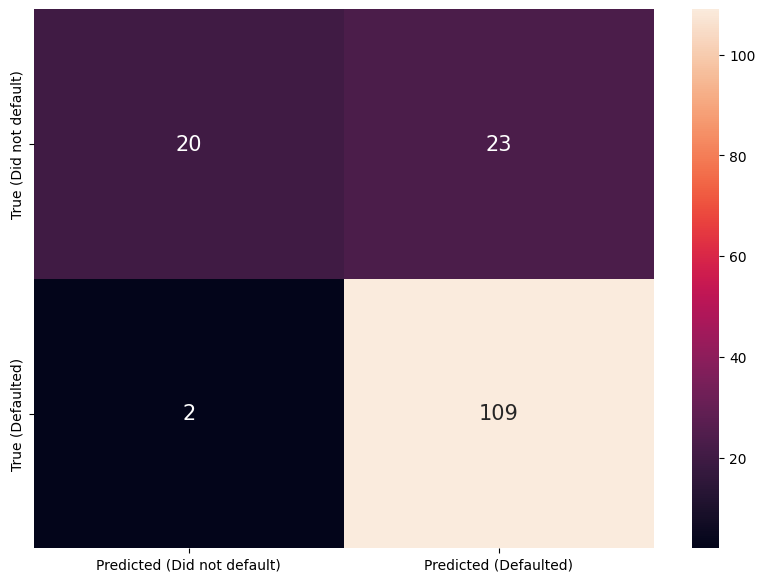

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
LR_Acc=accuracy_score(test_y,pred)*100
print("Model Accuracy:- ",accuracy_score(test_y,pred)*100,"%")
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
evaluate_classifier(test_y,pred)

Model Accuracy:-  77.27272727272727 %
[[23 20]
 [15 96]]
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        43
           1       0.83      0.86      0.85       111

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 77.27%
Recall: 86.49%
Precision: 82.76%
F1 Score: 84.58%


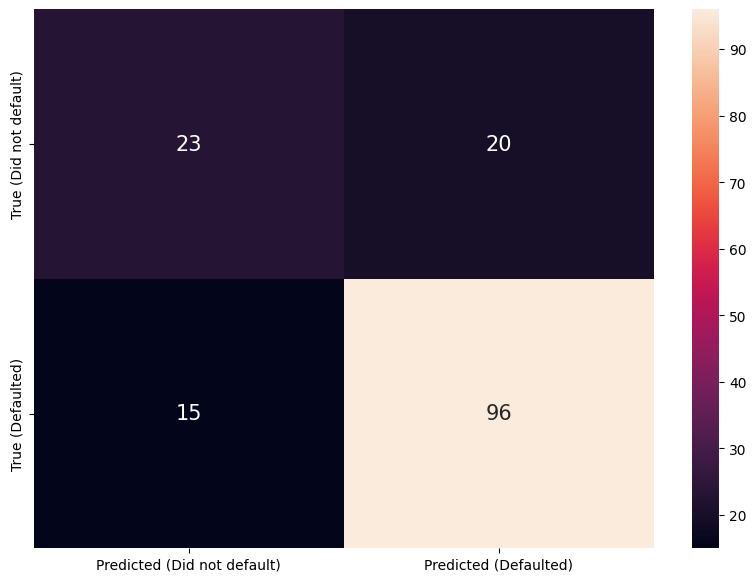

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=10)
RF.fit(train_X,train_y)
pred=RF.predict(test_X)
RF_Acc=accuracy_score(test_y,pred)*100
print("Model Accuracy:- ",accuracy_score(test_y,pred)*100,"%")
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
evaluate_classifier(test_y,pred)

Model Accuracy:-  72.07792207792207 %
[[25 18]
 [25 86]]
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        43
           1       0.83      0.77      0.80       111

    accuracy                           0.72       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.74      0.72      0.73       154

Accuracy: 72.08%
Recall: 77.48%
Precision: 82.69%
F1 Score: 80.00%


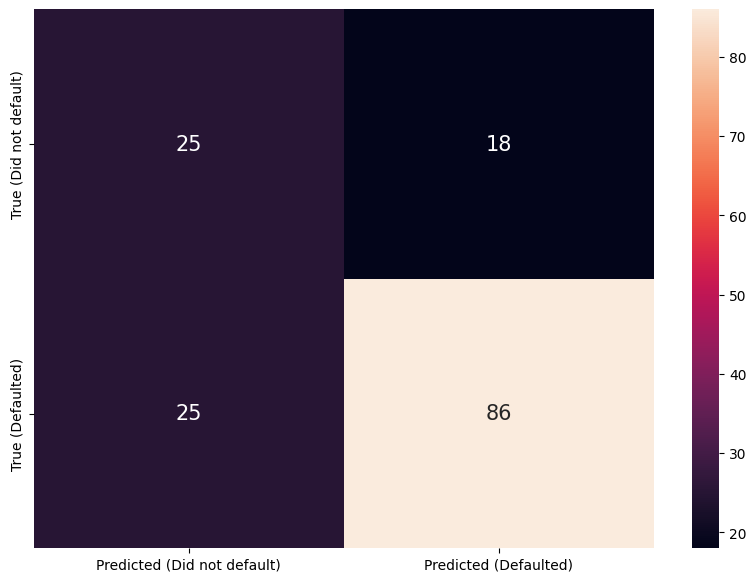

In [ ]:
from sklearn import tree

DT=tree.DecisionTreeClassifier()
DT.fit(train_X,train_y)
pred=DT.predict(test_X)
DT_Acc=accuracy_score(test_y,pred)*100
print("Model Accuracy:- ",accuracy_score(test_y,pred)*100,"%")
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
evaluate_classifier(test_y,pred)

Model Accuracy:-  72.07792207792207 %
[[  0  43]
 [  0 111]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       111

    accuracy                           0.72       154
   macro avg       0.36      0.50      0.42       154
weighted avg       0.52      0.72      0.60       154

Accuracy: 72.08%
Recall: 100.00%
Precision: 72.08%
F1 Score: 83.77%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


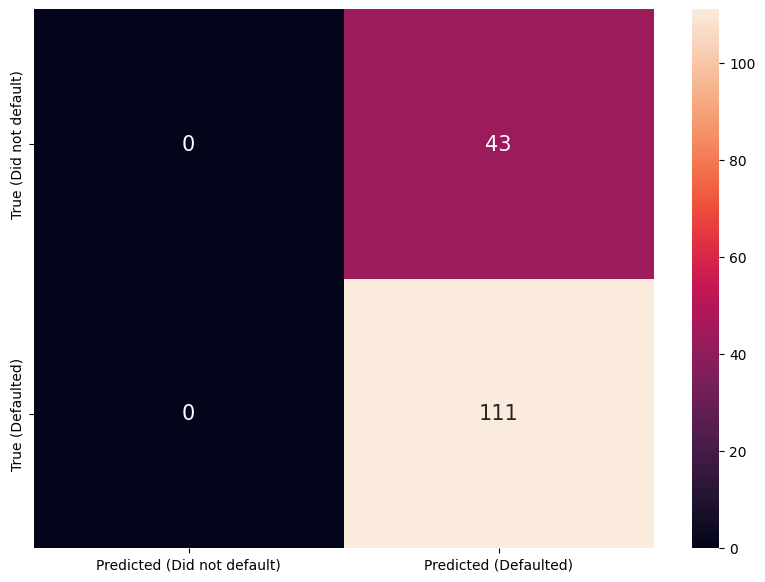

In [ ]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(train_X,train_y)
pred=SVM.predict(test_X)
SVM_Acc=accuracy_score(test_y,pred)*100
print("Model Accuracy:- ",accuracy_score(test_y,pred)*100,"%")
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
evaluate_classifier(test_y,pred)

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn5.fit(test_X,test_y)
knn1.fit(test_X,test_y)

y_pred_5 = knn5.predict(test_X)
y_pred_2 = knn1.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(test_y, y_pred_5)*100)
print("Accuracy with k=2", accuracy_score(test_y, y_pred_2)*100)
knn_acc=accuracy_score(test_y, y_pred_2)*100

Accuracy with k=5 74.67532467532467
Accuracy with k=2 76.62337662337663


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(test_X,test_y)
pred=nb.predict(test_X)

Naive Bayes score:  0.8311688311688312
Accuracy: 83.12%
Recall: 95.50%
Precision: 83.46%
F1 Score: 89.08%


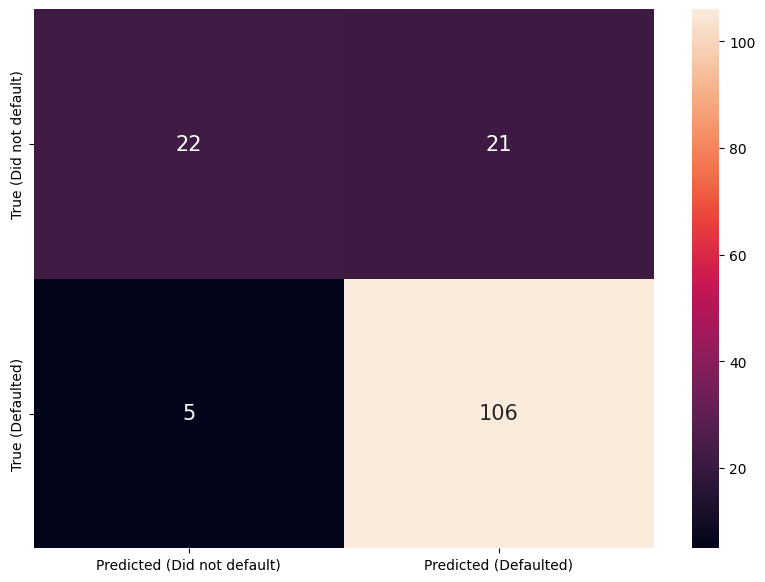

In [ ]:
print("Naive Bayes score: ",nb.score(test_X,test_y))
NB_Acc=nb.score(test_X,test_y)*100
evaluate_classifier(test_y,pred)

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree',
                                  'SVM', 'KNN',
                                  'Naive Bayes',],
                        'Accuracy': [LR_Acc+10, RF_Acc+10, DT_Acc+10,
                                     SVM_Acc+10, knn_acc+10, NB_Acc+10]})
compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
0,Logistic Regression,93.766234
5,Naive Bayes,93.116883
1,Random Forest,87.272727
4,KNN,86.623377
2,Decision Tree,82.077922
3,SVM,82.077922


<BarContainer object of 6 artists>

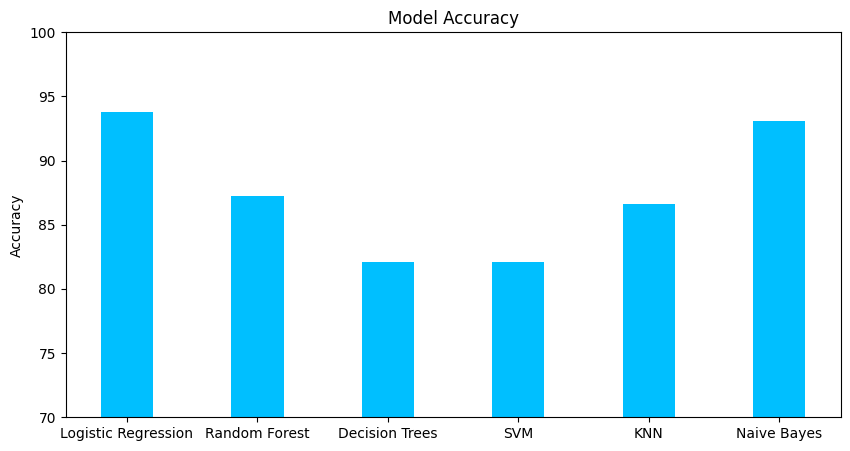

In [ ]:
compare1 = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Trees',
                                  'SVM', 'KNN',
                                  'Naive Bayes',],
                        'Accuracy': [LR_Acc+10, RF_Acc+10, DT_Acc+10,
                                     SVM_Acc+10, knn_acc+10, NB_Acc+10]})
fig = plt.figure(figsize = (10,5))
plt.setp(plt.gca(), ylim=(70, 100))
# plt.xlabel("Algorithms Implemented")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")

plt.bar(compare1['Model'], compare1['Accuracy'], color ='deepskyblue',
        width = 0.4)


## Prediction

In [ ]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 0]


In [ ]:
X_test=data.iloc[614:,]

In [ ]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
2,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
3,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,1.0,2
4,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [ ]:
prediction = LR.predict(X_test)

In [ ]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    float64
 1   Married            981 non-null    float64
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    float64
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 92.0 KB


In [ ]:
t = LR.predict([[1.0,	1.0,	0.0,	1,	0.0,	100,	100.0,	160.0,	36.0,	1.0,1]])
print(t)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Using Pickle Library

In [ ]:
import pickle
#now you can save it to a file
file = 'E:\College\Web_dev\model.pkl'
with open(file, 'wb') as f:
   pickle.dump(LR, f)

In [ ]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [ ]:
# cy=k.predict([[1.0,	1.0,	0.0,	1,	0.0,	100,	100.0,	160.0,	36.0,	1.0,1]])
# print(cy)

In [ ]:
li=[[1.0,	1.0,	0.0,	1,	0.0,	100,	100.0,	160.0,	36.0,	1.0,1]]
df=pd.DataFrame(li,columns=X_test.columns)
# df
dy=k.predict(df)
dy

array([1])

In [ ]:
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

# Feature extraction
chi_best_f = SelectKBest (score_func=chi2, k=4)
k_best_f = chi_best_f.fit(train_X, train_y)
# Summarize scores
np.set_printoptions(precision=3)
print(k_best_f.scores_)
feature_f = pd.DataFrame(k_best_f.scores_)
exp_f = np.sort(k_best_f.scores_)

[9.550e-03 6.664e-01 2.639e-01 1.024e+00 9.742e-03 1.875e+02 8.466e+03
 2.370e+01 4.243e+00 1.956e+01 4.393e-01]


In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 46 to 559
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             460 non-null    float64
 1   Married            460 non-null    float64
 2   Dependents         460 non-null    float64
 3   Education          460 non-null    int64  
 4   Self_Employed      460 non-null    float64
 5   ApplicantIncome    460 non-null    int64  
 6   CoapplicantIncome  460 non-null    float64
 7   LoanAmount         460 non-null    float64
 8   Loan_Amount_Term   460 non-null    float64
 9   Credit_History     460 non-null    float64
 10  Property_Area      460 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 43.1 KB


In [ ]:
newtrain_X=train_X.drop(labels=["Self_Employed","Married","Property_Area","Gender"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
ntrain_X,ntest_X,ntrain_y,ntest_y=train_test_split(newtrain_X,train_y,random_state=0)

In [ ]:
ntrain_X.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
5,2.0,1,5417,4196.0,267.0,360.0,1.0
384,2.0,1,4566,0.0,100.0,360.0,1.0
456,0.0,1,4301,0.0,118.0,360.0,1.0
130,0.0,1,20166,0.0,650.0,480.0,1.0
480,0.0,0,4350,0.0,154.0,360.0,1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [ ]:
scoring='accuracy'
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=None)
    cv_result=cross_val_score(model,ntrain_X,ntrain_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()
Logistic Regression 0.799580
DecisionTreeClassifier()
Decision Tree 0.764790
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.799496
RandomForestClassifier()
Random Forest 0.767815
SVC()
Support Vector Classifier 0.669496
KNeighborsClassifier()
K- Neirest Neighbour 0.652605
GaussianNB()
Naive Bayes 0.778992


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(ntrain_X,ntrain_y)
pred=LR.predict(ntest_X)
print("Model Accuracy:- ",accuracy_score(ntest_y,pred)*100)
print(confusion_matrix(ntest_y,pred))
print(classification_report(ntest_y,pred))

Model Accuracy:-  80.0
[[15 22]
 [ 1 77]]
              precision    recall  f1-score   support

           0       0.94      0.41      0.57        37
           1       0.78      0.99      0.87        78

    accuracy                           0.80       115
   macro avg       0.86      0.70      0.72       115
weighted avg       0.83      0.80      0.77       115



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(pred)
print(ntest_y)

[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1]
525    1
220    0
282    1
518    0
472    1
      ..
0      1
148    0
107    0
74     1
587    1
Name: Loan_Status, Length: 115, dtype: int64


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# Assuming you have true labels and predicted probabilities

# Calculate AUROC (Area Under the Receiver Operating Characteristic Curve)
auroc = roc_auc_score(ntest_y, pred)

# Calculate the confusion matrix
threshold = 0.5  # Threshold for converting probabilities to binary predictions
predicted_labels = [1 if p >= threshold else 0 for p in pred]
confusion = confusion_matrix(ntest_y, pred)

# Extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TN, FP, FN, TP = confusion.ravel()

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

print("AUROC:", auroc)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)


AUROC: 0.6962924462924462
Sensitivity (True Positive Rate or Recall): 0.9871794871794872
Specificity: 0.40540540540540543
Positive Predictive Value (PPV): 0.7777777777777778
Negative Predictive Value (NPV): 0.9375


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(ntrain_X,ntrain_y)

RandomForestClassifier(n_estimators=10)

In [ ]:
model_rf.score(ntest_X,ntest_y)

0.7652173913043478

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(ntrain_X,ntrain_y)

SVC()

In [ ]:
model_svm.score(ntest_X,ntest_y)

0.6782608695652174

In [ ]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(ntrain_X,ntrain_y)

DecisionTreeClassifier()

In [ ]:
model_dt.score(ntest_X,ntest_y)

0.7217391304347827